In [2]:
##Import the required libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Now we  import the IPL2018 dataset and list out the columns
IPL18 = pd.read_excel('C:/Users/Jeet/Desktop/Cricket Analytics/IPL2018teams.xlsx')
print(IPL18.columns.tolist())


['scorecard_id', 'start_date', 'phase', 'name', 'home_team', 'away_team', 'toss_winner', 'toss_decision', 'inn1team', 'innings1', 'wickets1', 'overs1', 'closure1', 'innings2', 'wickets2', 'overs2', 'closure2', 'adjusted_target_indicator', 'adjusted_target', 'team1_overs', 'team2_overs', 'mom_player_id', 'mom_player', 'scoring_status', 'result_type', 'result_margin', 'winning_team']


In [4]:
#We can see how our dataframe looks like by just simply typing its name:
IPL18.head()

,scorecard_id,start_date,phase,name,home_team,away_team,toss_winner,toss_decision,inn1team,innings1,...,adjusted_target_indicator,adjusted_target,team1_overs,team2_overs,mom_player_id,mom_player,scoring_status,result_type,result_margin,winning_team
0,1056637,2018-04-07,NaN,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,Chennai Super Kings,f,Mumbai Indians,165,...,n,0,20.0,20,44613,DJ Bravo,live bbb,ww,1,Chennai Super Kings
1,1056638,2018-04-08,NaN,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,f,Delhi Daredevils,166,...,n,0,20.0,20,170187,KL Rahul,live bbb,ww,6,Kings XI Punjab
2,1056639,2018-04-08,NaN,"Eden Gardens, Kolkata",Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,f,Royal Challengers Bangalore,176,...,n,0,20.0,20,412485,N Rana,live bbb,ww,4,Kolkata Knight Riders
3,1056640,2018-04-09,NaN,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Sunrisers,Rajasthan Royals,Sunrisers,f,Rajasthan Royals,125,...,n,0,20.0,20,15627,S Dhawan,live bbb,ww,9,Sunrisers
4,1056641,2018-04-10,NaN,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,f,Kolkata Knight Riders,202,...,n,0,20.0,20,119895,SW Billings,live bbb,ww,5,Chennai Super Kings


In [5]:
#In this cell compelete a number tasks. First we identify when the home team is the winning team, and when the visiting team 
# is the winner. Next we identify the runs scored by the home team and the away team. 
#Finally, we include a counter which we can add up to give total number of games for each team.
IPL18['hwin'] = np.where(IPL18['home_team']==IPL18['winning_team'],1,0)
IPL18['awin'] = np.where(IPL18['away_team']==IPL18['winning_team'],1,0)
IPL18['htruns'] = np.where(IPL18['home_team']==IPL18['inn1team'],IPL18['innings1'], IPL18['innings2'])
IPL18['atruns'] = np.where(IPL18['away_team']==IPL18['inn1team'],IPL18['innings1'], IPL18['innings2'])
IPL18['count']= 1


In [6]:
IPL18.head()

,scorecard_id,start_date,phase,name,home_team,away_team,toss_winner,toss_decision,inn1team,innings1,...,mom_player,scoring_status,result_type,result_margin,winning_team,hwin,awin,htruns,atruns,count
0,1056637,2018-04-07,NaN,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,Chennai Super Kings,f,Mumbai Indians,165,...,DJ Bravo,live bbb,ww,1,Chennai Super Kings,0,1,165,169,1
1,1056638,2018-04-08,NaN,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,f,Delhi Daredevils,166,...,KL Rahul,live bbb,ww,6,Kings XI Punjab,1,0,167,166,1
2,1056639,2018-04-08,NaN,"Eden Gardens, Kolkata",Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,f,Royal Challengers Bangalore,176,...,N Rana,live bbb,ww,4,Kolkata Knight Riders,1,0,177,176,1
3,1056640,2018-04-09,NaN,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Sunrisers,Rajasthan Royals,Sunrisers,f,Rajasthan Royals,125,...,S Dhawan,live bbb,ww,9,Sunrisers,1,0,127,125,1
4,1056641,2018-04-10,NaN,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,f,Kolkata Knight Riders,202,...,SW Billings,live bbb,ww,5,Chennai Super Kings,1,0,205,202,1


In [10]:
#Now we use groupby command to aggregate the performance of home teams during the season
# Now we use groupby command to aggregate the performance of home teams during the season
IPLhome = IPL18.groupby('home_team')[['count', 'hwin', 'htruns', 'atruns']].sum().reset_index()
IPLhome = IPLhome.rename(columns={'home_team': 'team', 'count': 'Ph', 'htruns': 'htrunsh', 'atruns': 'atrunsh'})
IPLhome


,team,Ph,hwin,htrunsh,atrunsh
0,Chennai Super Kings,9,8,1577,1486
1,Delhi Daredevils,7,4,1258,1122
2,Kings XI Punjab,7,4,1188,1202
3,Kolkata Knight Riders,9,5,1468,1417
4,Mumbai Indians,7,3,1194,1171
5,Rajasthan Royals,7,5,1120,994
6,Royal Challengers Bangalore,7,4,1298,1286
7,Sunrisers,7,5,1070,1050


In [11]:
#Now we aggregate away teams
IPLaway = IPL18.groupby('away_team')[['count','awin','htruns','atruns']].sum().reset_index()
IPLaway = IPLaway.rename(columns={'away_team':'team','count':'Pa','htruns':'htrunsa','atruns':'atrunsa'})
IPLaway

,team,Pa,awin,htrunsa,atrunsa
0,Chennai Super Kings,7,3,1264,1232
1,Delhi Daredevils,7,1,1265,1085
2,Kings XI Punjab,7,2,1124,1022
3,Kolkata Knight Riders,7,4,1326,1291
4,Mumbai Indians,7,3,1111,1186
5,Rajasthan Royals,8,2,1362,1237
6,Royal Challengers Bangalore,7,2,1097,1024
7,Sunrisers,10,5,1624,1651


In [12]:
#Now we will merge both datasets
IPL18 = pd.merge(IPLhome,IPLaway, on=['team'])
IPL18

,team,Ph,hwin,htrunsh,atrunsh,Pa,awin,htrunsa,atrunsa
0,Chennai Super Kings,9,8,1577,1486,7,3,1264,1232
1,Delhi Daredevils,7,4,1258,1122,7,1,1265,1085
2,Kings XI Punjab,7,4,1188,1202,7,2,1124,1022
3,Kolkata Knight Riders,9,5,1468,1417,7,4,1326,1291
4,Mumbai Indians,7,3,1194,1171,7,3,1111,1186
5,Rajasthan Royals,7,5,1120,994,8,2,1362,1237
6,Royal Challengers Bangalore,7,4,1298,1286,7,2,1097,1024
7,Sunrisers,7,5,1070,1050,10,5,1624,1651


In [21]:
#Now we aggregate the home and away team data on wins, Games and runs

IPL18['G'] = IPL18['Ph']+IPL18['Pa']
IPL18['W'] = IPL18['hwin']+IPL18['awin']
IPL18['R'] = IPL18['htrunsh']+IPL18['atrunsa']
IPL18['RA'] = IPL18['atrunsh']+IPL18['htrunsa']
IPL18





,team,Ph,hwin,htrunsh,atrunsh,Pa,awin,htrunsa,atrunsa,G,W,R,RA
0,Chennai Super Kings,9,8,1577,1486,7,3,1264,1232,16,11,2809,2750
1,Delhi Daredevils,7,4,1258,1122,7,1,1265,1085,14,5,2343,2387
2,Kings XI Punjab,7,4,1188,1202,7,2,1124,1022,14,6,2210,2326
3,Kolkata Knight Riders,9,5,1468,1417,7,4,1326,1291,16,9,2759,2743
4,Mumbai Indians,7,3,1194,1171,7,3,1111,1186,14,6,2380,2282
5,Rajasthan Royals,7,5,1120,994,8,2,1362,1237,15,7,2357,2356
6,Royal Challengers Bangalore,7,4,1298,1286,7,2,1097,1024,14,6,2322,2383
7,Sunrisers,7,5,1070,1050,10,5,1624,1651,17,10,2721,2674


In [22]:
# The last step in organizing the data is to create variables for win percentage (wpc) and the Pythagorean Expectation (pyth).

IPL18['wpc'] = IPL18['W']/IPL18['G']
IPL18['pyth'] = IPL18['R']**2/(IPL18['R']**2 + IPL18['RA']**2)
IPL18

,team,Ph,hwin,htrunsh,atrunsh,Pa,awin,htrunsa,atrunsa,G,W,R,RA,wpc,pyth
0,Chennai Super Kings,9,8,1577,1486,7,3,1264,1232,16,11,2809,2750,0.687500,0.510612
1,Delhi Daredevils,7,4,1258,1122,7,1,1265,1085,14,5,2343,2387,0.357143,0.490698
2,Kings XI Punjab,7,4,1188,1202,7,2,1124,1022,14,6,2210,2326,0.428571,0.474444
3,Kolkata Knight Riders,9,5,1468,1417,7,4,1326,1291,16,9,2759,2743,0.562500,0.502908
4,Mumbai Indians,7,3,1194,1171,7,3,1111,1186,14,6,2380,2282,0.428571,0.521012
5,Rajasthan Royals,7,5,1120,994,8,2,1362,1237,15,7,2357,2356,0.466667,0.500212
6,Royal Challengers Bangalore,7,4,1298,1286,7,2,1097,1024,14,6,2322,2383,0.428571,0.487037
7,Sunrisers,7,5,1070,1050,10,5,1624,1651,17,10,2721,2674,0.588235,0.508711


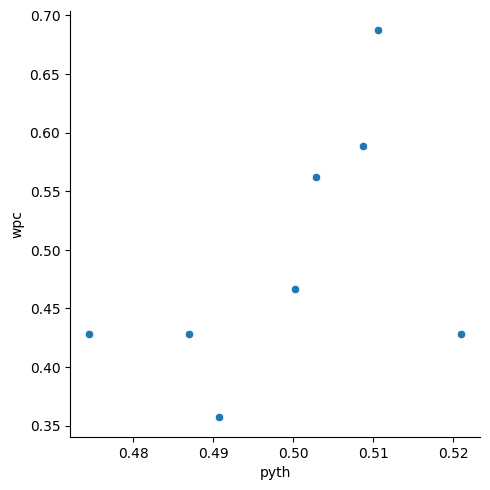

In [25]:
#Having prepared the data, we are now ready to examine it. First, we generate and xy plot use the Seaborn package.
sns.relplot(x="pyth", y="wpc", data =IPL18)

We now run the same regression as we did for the MLB data:

wpc = Intercept + coef x pyth

In [26]:
pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=IPL18).fit()
pyth_lm.summary()

C:\Users\Jeet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  k, _ = kurtosistest(a, axis)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     1.830
Date:                Thu, 14 Mar 2024   Prob (F-statistic):              0.225
Time:                        12:07:31   Log-Likelihood:                 7.9710
No. Observations:                   8   AIC:                            -11.94
Df Residuals:                       6   BIC:                            -11.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2807      1.312     -0.976      0.367      -4.491       1.929
pyth           3.5522      2.626      1.353      0.225      -2.872       9.977
==============================================================================
Omnibus:                        0.002   Durbin-Watson:                   2.254
Prob(Omnibus):                  0.999   Jarque-Bera (JB):                0.217
Skew:                           0.014   Prob(JB):                        0.897
Kurtosis:                       2.193   Cond. No.                         89.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion
Why did the Pythagorean model did notfit well for the cricket data? An obvious explanation is that in cricket, the team batting second need only score one more run than the opponent to win, and so the inning ends if it reaches this milestone. If the team batting second is the winning team, then the gap in the scores will be small. However, if the team batting first can get all ten wickets cheaply, then the gap in scores could be very large. In our data the average runs difference when the team batting second won was 2, and when the team batting first won was 30. This might explain why the Pythagorean Expectation is not a good guide to winning in the IPL.